# Aparment Cost Evaluator

#### Import necessary libraries

In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

#### Input parameters

In [2]:
freq = 12  # monthly frequency
years = 5   # years to save money
current_price = 120000  # current apartment price
annual_increase_rate = 0.05  # annual growth rate of apartment price
annual_interest_rate = 0.12  # annual interest rate for bank savings

#### Calculations for future price and monthly payments

Calculate number of periods and rates

In [3]:
rate_increase = annual_increase_rate / freq  # monthly growth rate of apartment price
rate_interest = annual_interest_rate / freq  # monthly interest rate for savings
nper = years * freq  # total number of periods (months)

Future price of the apartment after given years

In [4]:
future_price = current_price * (1 + annual_increase_rate) ** years
print(f"Orientacyjna cena mieszkania za {years} lat: {future_price:.2f} zł")

Orientacyjna cena mieszkania za 5 lat: 153153.79 zł


Monthly payment to reach future price

In [5]:
monthly_payment = npf.pmt(rate_interest, nper, 0, -future_price)
print(f"Miesięczna wpłata do banku: {monthly_payment:.2f} zł")

Miesięczna wpłata do banku: 1875.28 zł


Time periods

In [6]:
periods = np.arange(1, nper + 1, dtype=int)

#### Calculate vectors for apartment price growth & savings growth

Monthly apartment price growth over time

In [7]:
house_prices = current_price * (1 + rate_increase) ** periods

Savings growth over time assuming monthly payments

In [8]:
savings = npf.fv(rate_interest, periods, -monthly_payment, 0)

## Plotting results

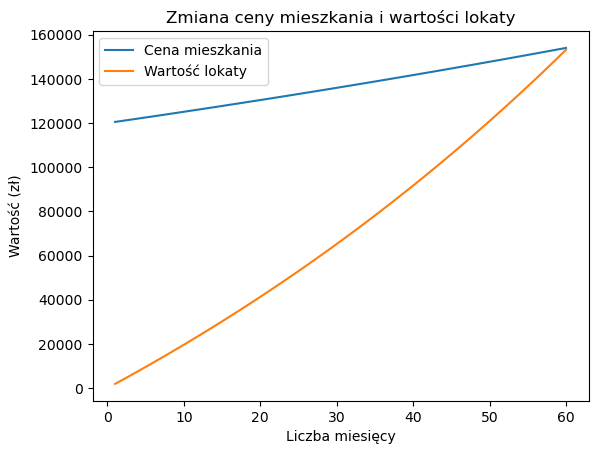

In [9]:
plt.plot(periods, house_prices, label='Cena mieszkania')
plt.plot(periods, savings, label='Wartość lokaty')
plt.legend()
plt.xlabel('Liczba miesięcy')
plt.ylabel('Wartość (zł)')
plt.title('Zmiana ceny mieszkania i wartości lokaty')
plt.show()